In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import zipfile

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Idea: Subscribers are more likely than non-subscribers (customers) to use Citi Bike during the week
Null Hypotheis: non-subscribers use Citi Bike during the week as much as or more than subscribers
Alternative Hypotheis: non-subscribers use Citi Bike during the week less than subscribers
H0: UserTypec/weekday >= UserTypes/weekday
H1: Usertypec/weekday < UserTypes/weekday
Significance Level  $\\alpha=0.05$

In [2]:
#Using the GetCitiBikeCSV function provided in previous notebooks
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201502'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
#opening the selected data set and converting time to date time
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:

#drop columns that we don't need
df.drop([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'birth year', u'gender'], axis=1, inplace=True)

In [7]:
df.head()

,usertype,date
0,Subscriber,2015-02-01 00:00:00
1,Subscriber,2015-02-01 00:00:00
2,Subscriber,2015-02-01 00:01:00
3,Subscriber,2015-02-01 00:01:00
4,Subscriber,2015-02-01 00:01:00


In [8]:
df['usertype'] = df['usertype'].replace(['Subscriber', 'Customer'], [1, 2])
#changed subscriber = 1 and user= 2 in order to plot

In [9]:
df.head(79)
#confirmed line 77 is 'Customer' on csv file, confirmed that replacement worked

,usertype,date
0,1,2015-02-01 00:00:00
1,1,2015-02-01 00:00:00
2,1,2015-02-01 00:01:00
3,1,2015-02-01 00:01:00
4,1,2015-02-01 00:01:00
5,1,2015-02-01 00:02:00
6,1,2015-02-01 00:04:00
7,1,2015-02-01 00:04:00
8,1,2015-02-01 00:04:00
9,1,2015-02-01 00:05:00


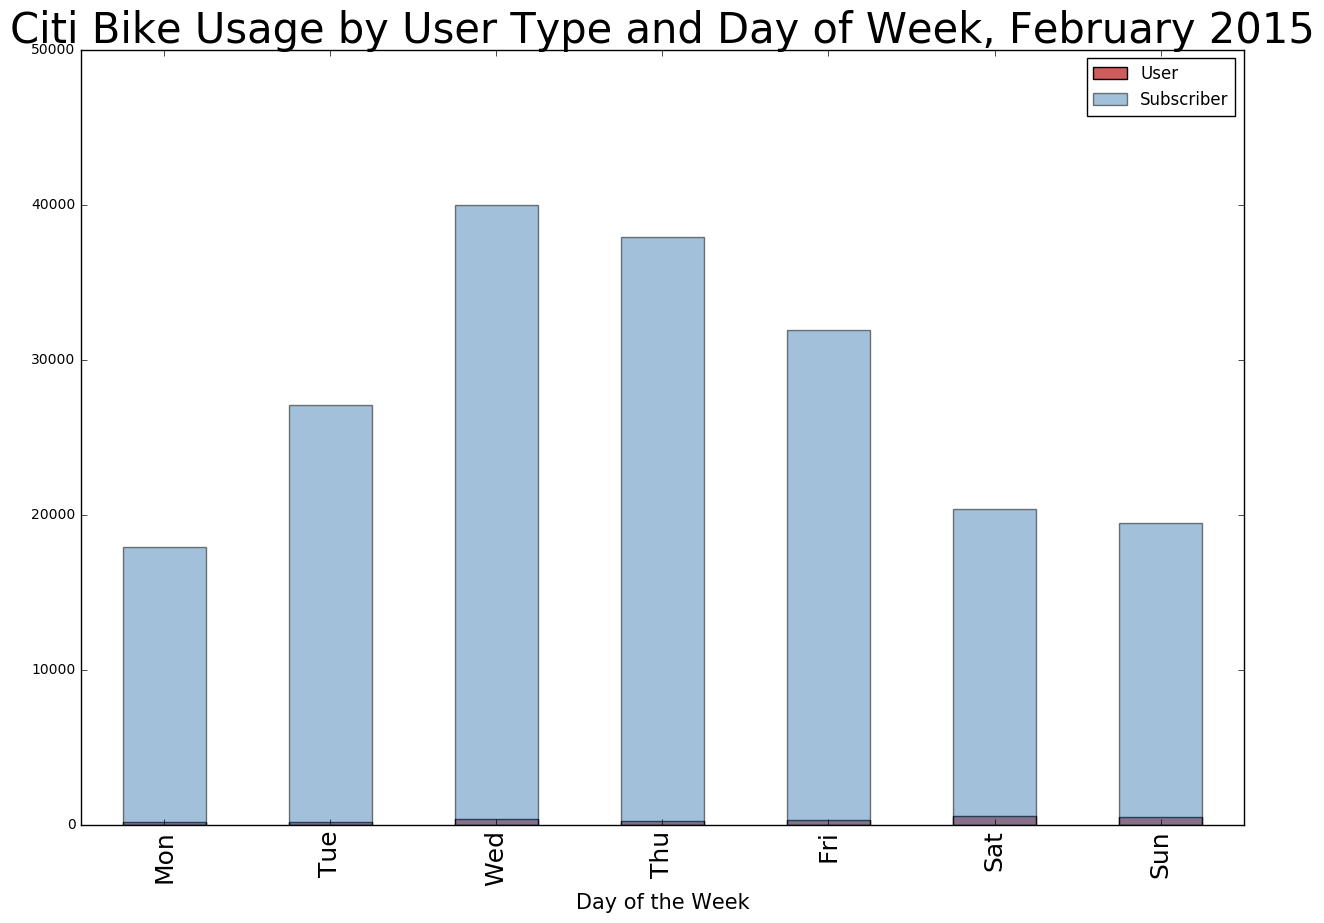

In [10]:
fig = pl.figure(figsize(15,10))

norm_u = 1
((df['date'][df['usertype'] == 2].groupby([df['date'].dt.weekday]).count()) / 
 norm_u).plot(kind="bar", color='IndianRed', label='User')
norm_s = 1
ax = ((df['date'][df['usertype'] == 1].groupby([df['date'].dt.weekday]).count()) / 
      norm_s).plot(kind="bar", color='SteelBlue', alpha=0.5,label='Subscriber')
tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=18)
ax.set_ylim([0,50000])
pl.xlabel('Day of the Week', fontsize=15)
pl.title ('Citi Bike Usage by User Type and Day of Week, February 2015', fontsize =30)
pl.legend()